In [9]:
import numpy as np
import matplotlib.pyplot as plt

np.warnings.filterwarnings("ignore")

# https://realpython.com/mandelbrot-set-python/

In [2]:
# create function for mandelbrot formula

# 1. recursive approach
def z(n, c):
  """
  returns the nth element of the sequence
  """

  if n == 0:
    return 0
  else:
    return z(n - 1, c) ** 2 + c

In [3]:
# try function with first 10 elements for c = 1
for n in range(10):
  print(f'z({n})  = {z(n, c = 1)}')


z(0)  = 0
z(1)  = 1
z(2)  = 2
z(3)  = 5
z(4)  = 26
z(5)  = 677
z(6)  = 458330
z(7)  = 210066388901
z(8)  = 44127887745906175987802
z(9)  = 1947270476915296449559703445493848930452791205


In [4]:
# 2. iterative approach

def sequence(c):
  """
  returns a generator object
  """

  z = 0
  while True:
    yield z
    z = z ** 2 + c

In [5]:
# enumerate function and stop the loop after given number of iterations
for n, z in enumerate(sequence(c = 1)):
  print(f'z({n}) = {z}')
  if n >= 9:
    break

z(0) = 0
z(1) = 1
z(2) = 2
z(3) = 5
z(4) = 26
z(5) = 677
z(6) = 458330
z(7) = 210066388901
z(8) = 44127887745906175987802
z(9) = 1947270476915296449559703445493848930452791205


The results are the same but the generator function calculates the seuqnece of elements more efficiently by using "lazy evaluation."

### Visualize the Mandelbrot Set using Matplotlib

In [8]:
# generates initial set of candidate values, which
# creates evenly spaced numbers in a given range

def complex_matrix(xmin, xmax, ymin, ymax, pixel_density):
  """
  xmin, xmax: specify bounds in horizontal direction
  ymin, ymax: specify bounds in vertical direction
  pixel_density: determines desired number of pixels per unit

  Returns: 2d array of complex numbers
  """

  re = np.linspace(xmin, xmax, int((xmax - xmin) * pixel_density))
  im = np.linspace(ymin, ymax, int((ymax - ymin) * pixel_density))
  return re[np.newaxis, :] + im[:, np.newaxis] * 1j

In [15]:
# run the initial set of candidates through the well-known recursive formula

def is_stable(c, num_iterations):
  z = 0
  for _ in range(num_iterations):
    z = z ** 2 + c
  return abs(z) <= 2

In [16]:
# visualize through a scatter plot

# since complez numbers are pairs of real and imaginary complents,
# we have to untangle them into separate arrays that'll play nicely 
# with the scatter plot

def get_members(c, num_iterations):
  """
  Returns: 1d array of only complex numbesr that are stable and belong to mandelbrot set
  """
  mask = is_stable(c, num_iterations)
  return c[mask]

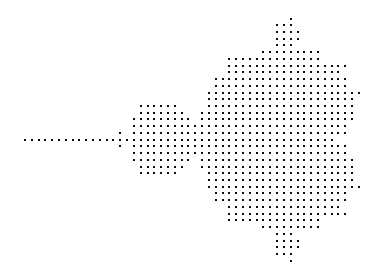

In [18]:
# calculate data and plot it
c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=21)
members = get_members(c, num_iterations = 100)

plt.scatter(members.real, members.imag, color = "black", marker = ",", s = 1)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

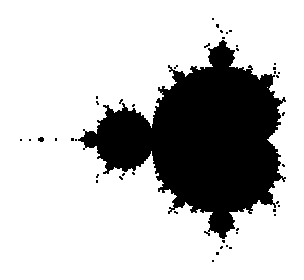

In [22]:
# calculate data and plot it
c = complex_matrix(-2, 0.5, -1.5, 1.5, pixel_density=1000)
members = get_members(c, num_iterations = 1000)

plt.scatter(members.real, members.imag, color = "black", marker = ",", s = 1)
plt.gca().set_aspect("equal")
plt.axis("off")
plt.tight_layout()
plt.show()

In [ ]:
# can draw with pillow too, which will give more 
# granular control over the visualization process
# that will let depict mandelbrot set in more interesting ways